In [1]:
#from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
import os
from sklearn.preprocessing import OneHotEncoder
import PIL
from PIL import Image, ImageOps
from numpy import *

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# visualisation imports
from keras.callbacks import TensorBoard
from time import time

/Users/zes3/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


NameError: name 'vocabulary_size' is not defined

In [3]:
# input image dimensions
img_rows, img_cols = 227, 227

# number of channels
img_channels = 3

#  data
path1 = '/Users/zes3/Documents/BaumbilderBA_augmented'    #path of folder of images
path2 = '/Users/zes3/Documents/BaumbilderBA_augmented_farbig_227'  #path of folder to save images
#dirname2 = 'BaumbilderBA_farbig_227/'

# find and resize images
#listing = os.listdir(path1)

'''for file in listing:
        #print(file)
        if file == '.DS_Store':
            continue
        im = Image.open(path1 + '/' + file) 
        img = im.resize((img_rows,img_cols))
        #need to do some more processing here
        img.save(path2 +'/' + file, "JPEG")
'''
# flatten images
imlist = os.listdir(path2)

if '.DS_Store' in imlist:
    imlist.remove('.DS_Store')

In [4]:
# open one image to get size
im1 = array(Image.open(path2 + '/' + imlist[0]))
m,n = im1.shape[0:2]

imnbr = len(imlist) # get the number of images

# test with some images
imnbr = 1000
imlist = imlist[:1000]

# create matrix to store all flattened images
immatrix = array([array(Image.open(path2 + '/' + im2)).flatten()
              for im2 in imlist],'f')
num_samples = imnbr
print(num_samples)
print(immatrix.shape)

1000
(1000, 154587)


In [5]:
# label
label=np.ones((num_samples,),dtype = int)

i=0
while i < len(imlist):
    fileName = imlist[i]
    #print(str(i) + "->" + fileName)
    if "Bergahorn" in fileName:
        label[i] = 0
        #print("Bergahorn")
    if "Spitzahorn" in fileName:
        label[i] = 1
        #print("Spitzahorn")
    if "Feldahorn" in fileName:
        label[i] = 2
        #print("Feldahorn")
    if "Buche" in fileName:
        label[i] = 3
        #print("Buche")
    if "Birke" in fileName:
        label[i] = 4
        #print("Birke")
    if "Eiche" in fileName:
        label[i] = 5
        #print("Eiche")
    if "Stechpalme" in fileName:
        label[i] = 6
        #print("Stechpalme")
    if "Ulme" in fileName:
        label[i] = 7
        #print("Ulme")
    if "Linde" in fileName:
        label[i] = 8
        #print("Linde")
    if "Kirsche" in fileName:
        label[i] = 9
        #print("Kirsche")
    if "Esche" in fileName:
        label[i] = 10
        #print("Esche")
    print(str(i) + "->" + imlist[i])
    print(label[i])
    i += 1

# prepare data and labels
# the method shuffle() randomizes the items of a list in place.
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

print(immatrix[0].shape)
#img=immatrix[7683].reshape(img_rows,img_cols)

#plt.imshow(img)
#plt.imshow(img,cmap='gray')
#plt.show()
print (train_data[0].shape)
print (train_data[1].shape)

0->Pferdezentrum_4_Birke2_376.png
4
1->Alle_alten_Bern_2_Eiche5_31.png
5
2->Alle_alten_Bern_3_Spitzahorn4_161.png
1
3->Isenfluh_1_Ulme2_261.png
7
4->Schwarzwasser_1_Esche3_1076.png
10
5->Sumiswald_4_Kirsche2_761.png
9
6->Schosshalden_1_Stechpalme7_426.png
6
7->Schwarzwasser_1_Esche1_636.png
10
8->Boenigen_1_Bergahorn12_461.png
0
9->Schosshalden_2_Feldahorn3_1091.png
2
10->Boenigen_4_Esche1_616.png
10
11->Biel_Vorstadt_2_Linde3_221.png
8
12->Schosshalden_2_Feldahorn7_166.png
2
13->Sumiswald_1_Esche1_251.png
10
14->Paul_Klee_1_Linde2_586.png
8
15->Wyssenau_Isenfluh_2_Esche3_481.png
10
16->Wyssenau_Isenfluh_1_Esche2_431.png
10
17->Alle_alten_Bern_5_Buche1_16.png
3
18->Wyssenau_Isenfluh_7_Ulme1_461.png
7
19->Schosshalden_4_Stechpalme7_226.png
6
20->Wyssenau_Isenfluh_4_Kirsche3_86.png
9
21->Pferdezentrum_1_Birke4_791.png
4
22->Alle_alten_Bern_1_Eiche5_736.png
5
23->Biel_4_Kirsche1_1.png
9
24->Isenfluh_1_Esche2_1221.png
10
25->Allmend_Schosshalden_3_Eiche4_416.png
5
26->Boenigen_2_Esche6_241

9
980->Allmend_Schosshalden_1_Ulme1_1.png
7
981->Schosshalden_2_Stechpalme8_6.png
6
982->Sumiswald_1_Kirsche2_466.png
9
983->Boenigen_7_Linde16_886.png
8
984->Sumiswald_2_Esche1_1491.png
10
985->Alle_alten_Bern_1_Bergahorn2_421.png
0
986->Schosshalden_2_Feldahorn5_276.png
2
987->Biel_Vorstadt_1_Linde2_251.png
8
988->Boenigen_1_Spitzahorn1_176.png
1
989->Schosshalden_1_Stechpalme5_736.png
6
990->Boenigen_1_Bergahorn4_321.png
0
991->Waldrand_3_Spitzahorn3_176.png
1
992->Boenigen_2_Linde1_381.png
8
993->Sumiswald_1_Linde1_1091.png
8
994->Sumiswald_4_Esche1_196.png
10
995->Allmend_Schosshalden_3_Feldahorn3_356.png
2
996->Pferdezentrum_1_Birke4_2061.png
4
997->Pferdezentrum_7_Birke4_3726.png
4
998->Allmend_Schosshalden_2_Feldahorn3_576.png
2
999->Alle_alten_Bern_4_Spitzahorn6_506.png
1
(154587,)
(1000, 154587)
(1000,)


X_train shape: (800, 227, 227, 3)
800 train samples
200 test samples


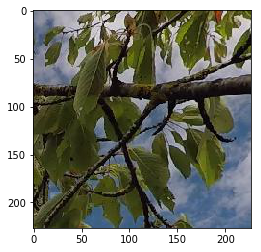

In [6]:
# prepare parameters and data
batch_size = 50
num_classes = 11
epochs = 5

(X, y) = (train_data[0],train_data[1])

# STEP 1: split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#TODO was bedeutet der letzte parameter?????????
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

img=X_train[0]

plt.imshow(img)
plt.show()


# prepare cnn and start training
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

input_shape = (img_rows, img_cols, img_channels)

In [ ]:
# Launch the graph in a session.
sess = tf.Session()
# Create a summary writer, add the 'graph' to the event file.
#writer = tf.summary.FileWriter('/Users/zes3/Documents/Bachelor_Thesis/outputs/logdir', sess.graph)
tensorboard = TensorBoard(log_dir="/Users/zes3/Documents/Bachelor_Thesis/outputs/logdir/{}".format(time()), histogram_freq=1,
  batch_size = 128, write_graph = True, write_grads = True,
  write_images = True, embeddings_freq = 1,
  embeddings_layer_names = [], embeddings_metadata = [],
  embeddings_data = [], update_freq = "epoch")
# embeddings_layer_names:
# a list of names of layers to keep eye on. If NULL or empty list all the embedding layers will be watched.

embeddings = tf.Variable(
    tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
nce_weights = tf.Variable(
  tf.truncated_normal([vocabulary_size, embedding_size],
                      stddev=1.0 / math.sqrt(embedding_size)))
nce_biases = tf.Variable(tf.zeros([vocabulary_size]))
# Placeholders for inputs
train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

In [7]:
model = Sequential()

# convolutional layer 1
conv_1 = model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=input_shape))
# max pooling 1
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
          
# convolutional layer 2
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, activation='relu'))
# max pooling 2
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
# convolutional layer 3
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=1,
                activation='relu'))
# convolutional layer 4
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=1,
                activation='relu'))
# convolutional layer 5
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1,
                activation='relu'))
#max pooling 3
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
# dropout
model.add(Dropout(0.5))
model.add(Flatten())
# fully connected layer 1
model.add(Dense(256*6*6, activation='relu')) #ohne dropout 12*12?
model.add(Dropout(0.5))
# fully connected layer 2
model.add(Dense(4096, activation='relu'))
# fully connected layer 3
model.add(Dense(num_classes, activation='softmax'))

# initialize
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# train and evaluate
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard]
         )
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 937s 1s/step - loss: 2.6064 - acc: 0.1087 - val_loss: 2.3735 - val_acc: 0.1400
Epoch 2/5
800/800 [==============================] - 903s 1s/step - loss: 2.3607 - acc: 0.1462 - val_loss: 2.3346 - val_acc: 0.0950
Epoch 3/5
800/800 [==============================] - 881s 1s/step - loss: 2.3251 - acc: 0.1337 - val_loss: 2.3211 - val_acc: 0.1750
Epoch 4/5
800/800 [==============================] - 885s 1s/step - loss: 2.3302 - acc: 0.1550 - val_loss: 2.3167 - val_acc: 0.1750
Epoch 5/5
800/800 [==============================] - 885s 1s/step - loss: 2.3280 - acc: 0.1325 - val_loss: 2.3200 - val_acc: 0.1400
Test loss: 2.3200075817108154
Test accuracy: 0.14


In [8]:
for v in tf.trainable_variables():
    print(v)
    #getActivations(v.name,imageToUse)

<tf.Variable 'conv2d_1/kernel:0' shape=(11, 11, 3, 96) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(96,) dtype=float32_ref>
<tf.Variable 'conv2d_2/kernel:0' shape=(5, 5, 96, 256) dtype=float32_ref>
<tf.Variable 'conv2d_2/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 256, 384) dtype=float32_ref>
<tf.Variable 'conv2d_3/bias:0' shape=(384,) dtype=float32_ref>
<tf.Variable 'conv2d_4/kernel:0' shape=(3, 3, 384, 384) dtype=float32_ref>
<tf.Variable 'conv2d_4/bias:0' shape=(384,) dtype=float32_ref>
<tf.Variable 'conv2d_5/kernel:0' shape=(3, 3, 384, 256) dtype=float32_ref>
<tf.Variable 'conv2d_5/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'dense_1/kernel:0' shape=(1024, 9216) dtype=float32_ref>
<tf.Variable 'dense_1/bias:0' shape=(9216,) dtype=float32_ref>
<tf.Variable 'dense_2/kernel:0' shape=(9216, 4096) dtype=float32_ref>
<tf.Variable 'dense_2/bias:0' shape=(4096,) dtype=float32_ref>
<tf.Variable 'dense_3/kernel:0' shape=(4096, 11